<a href="https://colab.research.google.com/github/PLEX-GR00T/Data_Mining/blob/main/Deep_learning_signboards_models_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [2]:
print("GPU Available: ", tf.test.is_gpu_available())
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available:  True
Tensorflow Version:  2.8.0
Keras Version:  2.8.0


In [3]:
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
! nvidia-smi

Tue Apr 26 02:36:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    78W / 149W |    145MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
!pip install kaggle

In [6]:
! mkdir /content/drive/MyDrive/kaggle

mkdir: cannot create directory ‘/content/drive/MyDrive/kaggle’: File exists


In [7]:
!ls /content/drive/MyDrive/kaggle

kaggle.json


In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [9]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


# Load Kaggle Data

In [10]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 604M/612M [00:05<00:00, 145MB/s]
100% 612M/612M [00:05<00:00, 122MB/s]


In [11]:
%ls

kaggle.json


In [12]:
!kaggle config view #View current config values

Configuration values from /content/drive/MyDrive/kaggle
- username: gr00t16
- path: /content
- proxy: None
- competition: None


In [13]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [14]:
#changing the working directory
%cd /content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!pwd
!ls

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
gtsrb-german-traffic-sign.zip


In [15]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [16]:
os.chdir('/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign')
!ls 

gtsrb-german-traffic-sign.zip  Meta	 test  Test.csv  Train
meta			       Meta.csv  Test  train	 Train.csv


In [17]:
train_df = pd.read_csv('Train.csv')
# display a sneak peek of the data
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [18]:
print(f'Number of classes: {train_df.ClassId.unique().shape[0]}')

Number of classes: 43


In [19]:
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'No entry',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']

In [20]:
# add column with readable labels
train_df['Label'] = train_df['ClassId'].replace(sorted(train_df['ClassId'].unique()), labels)
# print updated df
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,Label
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png,Turn right
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png,Turn right
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png,Turn right
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png,Turn right
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png,Turn right


In [21]:
train_df.shape

(39209, 9)

## load these images off disk using 
image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [22]:
base_dir = '/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train'
print(base_dir)

/content/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/Train


In [23]:
batch_size = 32
img_height = 28 #180
img_width = 28 #180

In [24]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


In [27]:
labels = ['Speed Limit (20Km/H)', 'Speed Limit (30Km/H)','No Passing For Vechiles Over 3.5 Metric Tons','Right-Of-Way At The Next Intersection', 'Priority Road', 'Yield', 'Stop', 'No Vechiles', 'Vechiles Over 3.5 Metric Tons Prohibited', 'No Entry',
 'General Caution', 'Dangerous Curve To The Left', 'Speed Limit (50Km/H)',
 'Dangerous Curve To The Right', 'Double Curve', 'Bumpy Road',
 'Slippery Road', 'Road Narrows On The Right', 'Road Work', 'Traffic Signals',
 'Pedestrians', 'Children Crossing', 'Bicycles Crossing',
 'Speed Limit (60Km/H)', 'Beware Of Ice/Snow', 'Wild Animals Crossing',
 'End Of All Speed And Passing Limits', 'Turn Right Ahead',
 'Turn Left Ahead', 'Ahead Only', 'Go Straight Or Right',
 'Go Straight Or Left', 'Keep Right', 'Keep Left', 'Speed Limit (70Km/H)',
 'Roundabout Mandatory', 'End Of No Passing',
 'End Of No Passing By Vechiles Over 3.5 Metric Tons',
 'Speed Limit (80Km/H)', 'End Of Speed Limit (80Km/H)',
 'Speed Limit (100Km/H)', 'Speed Limit (120Km/H)', 'No Passing']

In [28]:
len(labels)

43

In [29]:
labels[int(class_names[0])] # convert to label

'Speed Limit (20Km/H)'

5
17
9
5
3
18
15
23
32


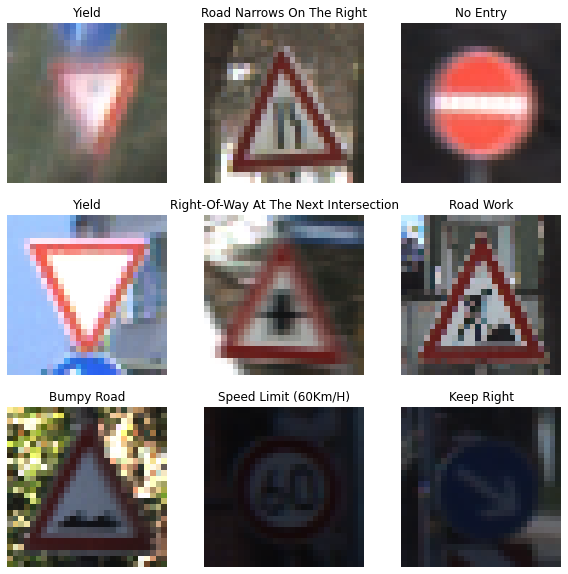

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    classid=groundlabels[i].numpy()
    print(classid)
    plt.title(labels[classid])
    plt.axis("off")

In [31]:
# manually iterate over the dataset and retrieve batches of images:
# This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). 
# The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)


In [32]:
image_batch

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[103.61607 ,  93.42857 ,  81.459816],
         [ 93.55357 , 109.79464 , 109.30357 ],
         [140.75446 , 117.55357 , 116.5759  ],
         ...,
         [ 67.49552 ,  57.71874 ,  45.013386],
         [ 79.553566,  68.848206,  51.303574],
         [ 87.102684,  80.04912 ,  55.29018 ]],

        [[ 96.72768 , 113.4375  , 104.28572 ],
         [ 69.90179 ,  87.01785 ,  88.03571 ],
         [172.52232 , 151.64285 , 150.34375 ],
         ...,
         [ 72.79463 ,  59.01339 ,  42.3125  ],
         [ 77.56697 ,  62.852676,  41.638397],
         [ 95.28126 ,  83.75    ,  59.3884  ]],

        [[173.35268 , 155.15625 , 147.5982  ],
         [135.05803 , 103.4241  ,  97.06696 ],
         [113.803566, 124.58035 , 115.21875 ],
         ...,
         [ 80.70088 ,  71.13839 ,  50.000004],
         [ 80.566986,  65.13394 ,  36.35717 ],
         [ 76.28125 ,  64.9375  ,  42.544647]],

        ...,

        [[ 59.450893,  51.245537,  

In [33]:
#Standardize the data, standardize values [0, 255] to be in the [0, 1]
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#There are two ways to use this layer. You can apply it to the dataset by calling map:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.031257536 0.40103042


In [34]:
#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
num_classes = len(class_names)
num_classes

43

## Professor's Model

In [36]:
model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [37]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [38]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
981/981 [==============================] - 31s 21ms/step - loss: 1.7271 - accuracy: 0.5457 - val_loss: 0.6151 - val_accuracy: 0.8354
Epoch 2/20
981/981 [==============================] - 6s 6ms/step - loss: 0.4710 - accuracy: 0.8739 - val_loss: 0.3318 - val_accuracy: 0.9174
Epoch 3/20
981/981 [==============================] - 6s 6ms/step - loss: 0.2842 - accuracy: 0.9239 - val_loss: 0.2382 - val_accuracy: 0.9416
Epoch 4/20
981/981 [==============================] - 6s 6ms/step - loss: 0.2224 - accuracy: 0.9416 - val_loss: 0.2017 - val_accuracy: 0.9517
Epoch 5/20
981/981 [==============================] - 8s 8ms/step - loss: 0.1941 - accuracy: 0.9495 - val_loss: 0.2320 - val_accuracy: 0.9475
Epoch 6/20
981/981 [==============================] - 6s 6ms/step - loss: 0.1723 - accuracy: 0.9563 - val_loss: 0.3010 - val_accuracy: 0.9209
Epoch 7/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1459 - accuracy: 0.9616 - val_loss: 0.2411 - val_accuracy: 0.9446
Epoc

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

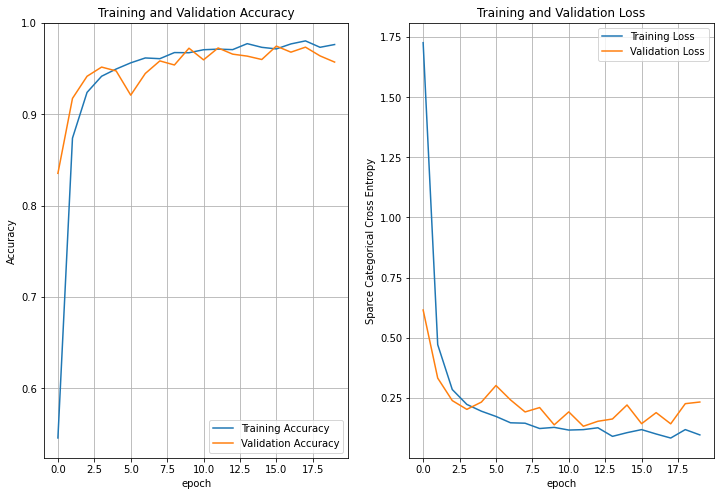

In [88]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(len(acc))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Sparce Categorical Cross Entropy')
plt.xlabel('epoch')
plt.grid(True)
plt.title('Training and Validation Loss')
plt.show()
fig.savefig('traininghistory.pdf')


## My Model 1

In [53]:
model1 = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='swish'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='swish'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='swish'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='swish'),
  layers.Dense(num_classes)
])

In [54]:
model1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [55]:
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
981/981 [==============================] - 9s 8ms/step - loss: 1.4471 - accuracy: 0.6227 - val_loss: 0.5331 - val_accuracy: 0.8586
Epoch 2/20
981/981 [==============================] - 7s 7ms/step - loss: 0.3674 - accuracy: 0.8979 - val_loss: 0.2306 - val_accuracy: 0.9376
Epoch 3/20
981/981 [==============================] - 7s 7ms/step - loss: 0.2225 - accuracy: 0.9401 - val_loss: 0.2105 - val_accuracy: 0.9455
Epoch 4/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1953 - accuracy: 0.9489 - val_loss: 0.1541 - val_accuracy: 0.9645
Epoch 5/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1532 - accuracy: 0.9581 - val_loss: 0.1647 - val_accuracy: 0.9626
Epoch 6/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1369 - accuracy: 0.9633 - val_loss: 0.1732 - val_accuracy: 0.9588
Epoch 7/20
981/981 [==============================] - 7s 7ms/step - loss: 0.1347 - accuracy: 0.9651 - val_loss: 0.2178 - val_accuracy: 0.9557
Epoch 

In [56]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 1, 1, 64)        

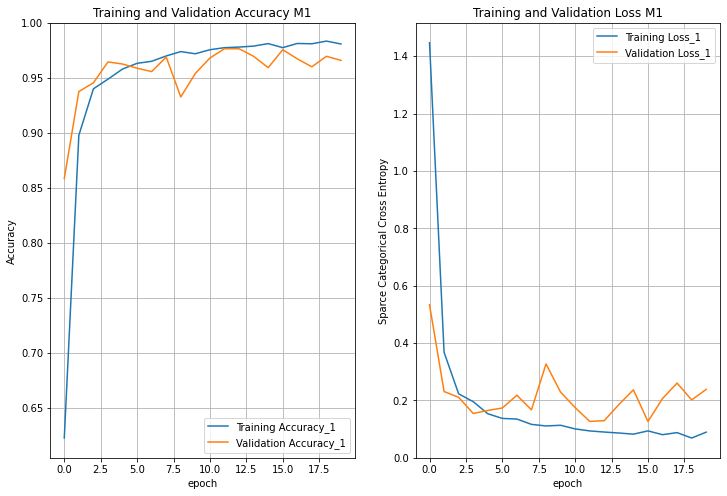

In [89]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1=history1.history['loss']
val_loss1=history1.history['val_loss']

epochs_range = range(len(acc1))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc1, label='Training Accuracy_1')
plt.plot(epochs_range, val_acc1, label='Validation Accuracy_1')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy M1')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss1, label='Training Loss_1')
plt.plot(epochs_range, val_loss1, label='Validation Loss_1')
plt.legend(loc='upper right')
plt.ylabel('Sparce Categorical Cross Entropy')
plt.xlabel('epoch')
plt.grid(True)
plt.title('Training and Validation Loss M1')
plt.show()
fig.savefig('traininghistory_M1.pdf')

## My Model 2 

In [72]:
model2 = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [73]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [74]:
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
981/981 [==============================] - 8s 8ms/step - loss: 1.1102 - accuracy: 0.7270 - val_loss: 0.2985 - val_accuracy: 0.9244
Epoch 2/20
981/981 [==============================] - 8s 8ms/step - loss: 0.2523 - accuracy: 0.9320 - val_loss: 0.2224 - val_accuracy: 0.9432
Epoch 3/20
981/981 [==============================] - 8s 8ms/step - loss: 0.1757 - accuracy: 0.9542 - val_loss: 0.1659 - val_accuracy: 0.9628
Epoch 4/20
981/981 [==============================] - 7s 8ms/step - loss: 0.1257 - accuracy: 0.9665 - val_loss: 0.1189 - val_accuracy: 0.9739
Epoch 5/20
981/981 [==============================] - 7s 8ms/step - loss: 0.1295 - accuracy: 0.9680 - val_loss: 0.1146 - val_accuracy: 0.9737
Epoch 6/20
981/981 [==============================] - 7s 8ms/step - loss: 0.0921 - accuracy: 0.9758 - val_loss: 0.1500 - val_accuracy: 0.9681
Epoch 7/20
981/981 [==============================] - 7s 8ms/step - loss: 0.1032 - accuracy: 0.9754 - val_loss: 0.1349 - val_accuracy: 0.9708
Epoch 

In [75]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 1, 1, 128)       

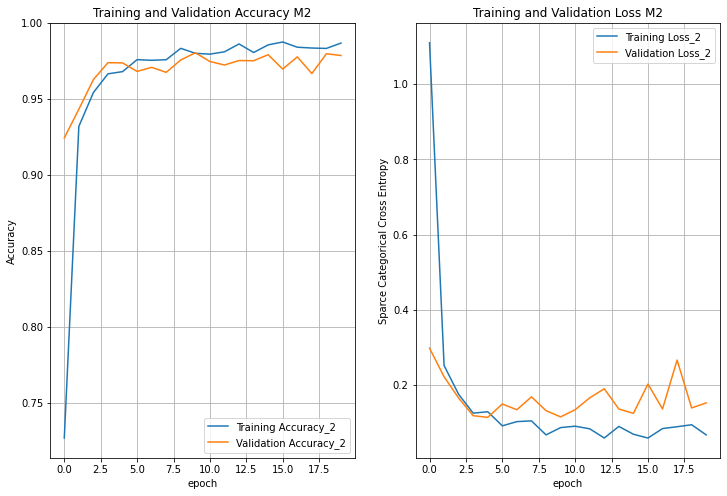

In [90]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2=history2.history['loss']
val_loss2=history2.history['val_loss']

epochs_range = range(len(acc2))

fig=plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy_2')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy_2')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([min(plt.ylim()),1])
plt.grid(True)
plt.title('Training and Validation Accuracy M2')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss_2')
plt.plot(epochs_range, val_loss2, label='Validation Loss_2')
plt.legend(loc='upper right')
plt.ylabel('Sparce Categorical Cross Entropy')
plt.xlabel('epoch')
plt.grid(True)
plt.title('Training and Validation Loss M2')
plt.show()
fig.savefig('traininghistory_M2.pdf')

# Comparison

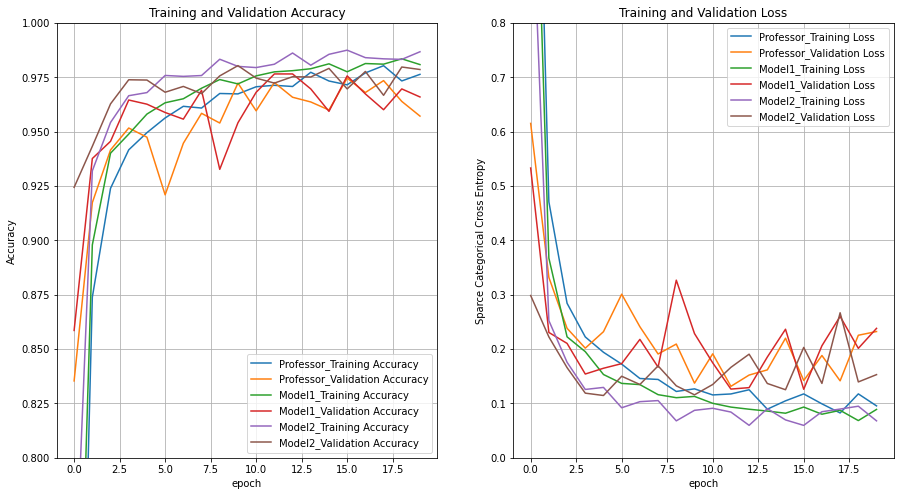

In [91]:
fig = plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Professor_Training Accuracy')
plt.plot(val_acc, label='Professor_Validation Accuracy')
plt.plot(acc1, label='Model1_Training Accuracy')
plt.plot(val_acc1, label='Model1_Validation Accuracy')
plt.plot(acc2, label='Model2_Training Accuracy')
plt.plot(val_acc2, label='Model2_Validation Accuracy')
plt.ylim([0.8, 1])
plt.grid(True)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Professor_Training Loss')
plt.plot(val_loss, label='Professor_Validation Loss')
plt.plot(loss1, label='Model1_Training Loss')
plt.plot(val_loss1, label='Model1_Validation Loss')
plt.plot(loss2, label='Model2_Training Loss')
plt.plot(val_loss2, label='Model2_Validation Loss')
plt.ylim([0, 0.8])
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel('Sparce Categorical Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
fig.savefig('traininghistory_Conclusion.pdf')

## Compare the Models Matrices
As you can see Model 2 is the winner. It shows the highest accuracy on the Validation data among all three Models.


|                                                | Professor's | My Model-1 | My Model-2 |
|:----------------------------------------------:|:---------:|:------:|:------------:|
| Total Parameters | 29,168 | 42,507 | 137,323 |
| Training Loss|0.0955|0.0890|0.0680|
| Validation Loss|0.2323|0.2381|0.1530|
| Training Accuracy|97.63 %|98.08%|98.67%|
| Validaiton Accuracy|95.71%|96.59%|97.89%|